Saving Picture2.png to Picture2.png


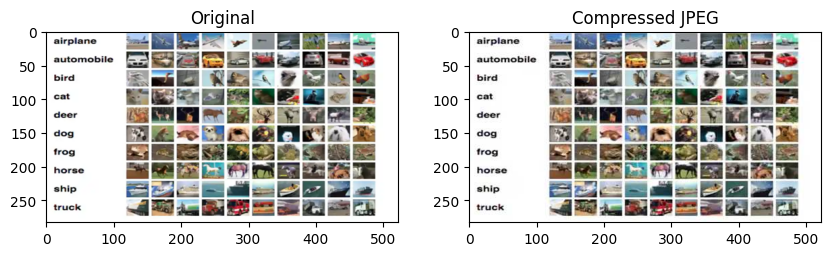

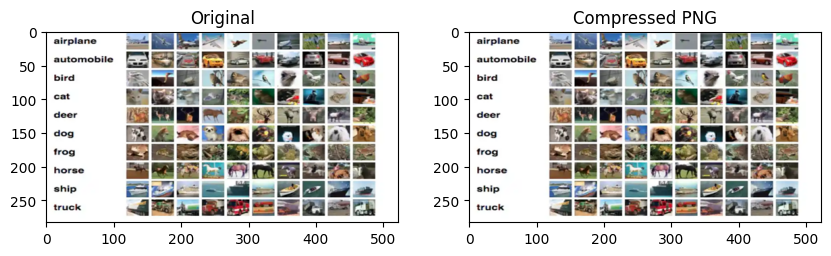

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import mnist, cifar10
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns

# Task 1: Image Compression

def compress_image(image_path, format, quality=90):
    image = cv2.imread(image_path)
    encode_param = [int(cv2.IMWRITE_JPEG_QUALITY if format=='jpeg' else cv2.IMWRITE_PNG_COMPRESSION), quality]
    result, encimg = cv2.imencode(f'.{format}', image, encode_param)
    decimg = cv2.imdecode(encimg, cv2.IMREAD_COLOR)
    return image, decimg

# Upload image
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# JPEG Compression
original, compressed_jpeg = compress_image(image_path, 'jpeg', 50)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(compressed_jpeg, cv2.COLOR_BGR2RGB)), plt.title('Compressed JPEG')
plt.show()

# PNG Compression
original, compressed_png = compress_image(image_path, 'png', 3)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(compressed_png, cv2.COLOR_BGR2RGB)), plt.title('Compressed PNG')
plt.show()

Saving Picture1.png to Picture1.png


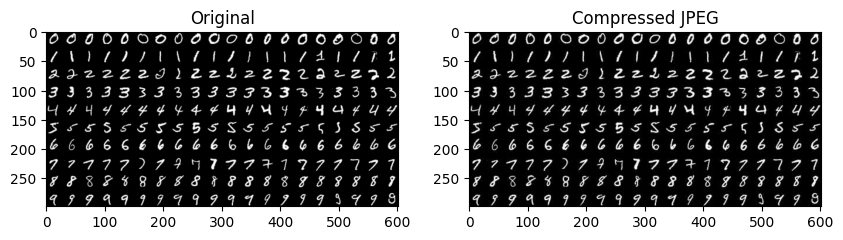

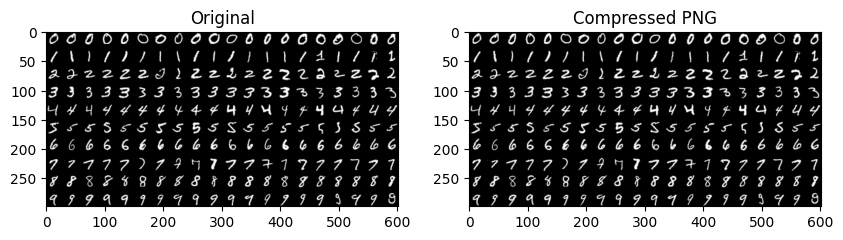

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.8993 - loss: 0.3312 - val_accuracy: 0.9823 - val_loss: 0.0589
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 19ms/step - accuracy: 0.9846 - loss: 0.0510 - val_accuracy: 0.9879 - val_loss: 0.0420
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9899 - loss: 0.0297 - val_accuracy: 0.9888 - val_loss: 0.0410
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.9937 - loss: 0.0193 - val_accuracy: 0.9887 - val_loss: 0.0413
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9954 - loss: 0.0147 - val_accuracy: 0.9893 - val_loss: 0.0380
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9960 - loss: 0.0121 - val_accuracy: 0.9903 - val_loss: 0.0418
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9973 - loss: 0.0086 - val_accuracy: 0.9893 - val_loss: 0.0434
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9976 -

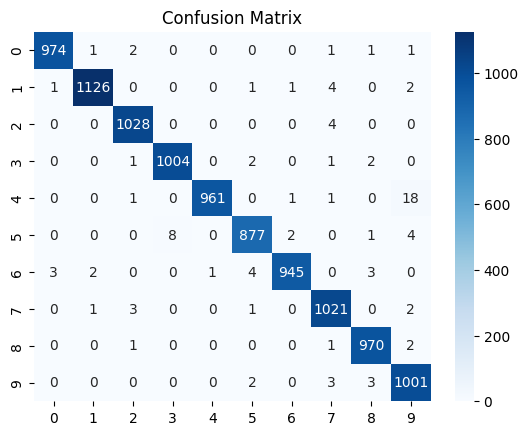

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      1.00      0.99       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


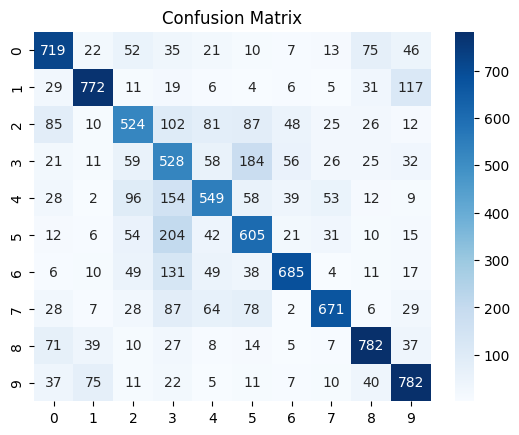

              precision    recall  f1-score   support

           0       0.69      0.72      0.71      1000
           1       0.81      0.77      0.79      1000
           2       0.59      0.52      0.55      1000
           3       0.40      0.53      0.46      1000
           4       0.62      0.55      0.58      1000
           5       0.56      0.60      0.58      1000
           6       0.78      0.69      0.73      1000
           7       0.79      0.67      0.73      1000
           8       0.77      0.78      0.78      1000
           9       0.71      0.78      0.75      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000



In [1]:
# Task 2: CNN Model for MNIST and CIFAR-10

def build_cnn(input_shape, num_classes):
    model = keras.Sequential([
        layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Load and preprocess MNIST
def preprocess_mnist():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0
    x_train, x_test = np.expand_dims(x_train, -1), np.expand_dims(x_test, -1)
    return (x_train, y_train), (x_test, y_test)

(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = preprocess_mnist()
model_mnist = build_cnn((28,28,1), 10)
history_mnist = model_mnist.fit(x_train_mnist, y_train_mnist, epochs=50, validation_split=0.2, verbose=1)

# Load and preprocess CIFAR-10
def preprocess_cifar():
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0
    return (x_train, y_train), (x_test, y_test)

(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = preprocess_cifar()
model_cifar = build_cnn((32,32,3), 10)
history_cifar = model_cifar.fit(x_train_cifar, y_train_cifar, epochs=50, validation_split=0.2, verbose=1)

# Evaluate models
def evaluate_model(model, x_test, y_test):
    y_pred = np.argmax(model.predict(x_test), axis=1)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()
    print(classification_report(y_test, y_pred))

# Evaluate MNIST Model
evaluate_model(model_mnist, x_test_mnist, y_test_mnist)

# Evaluate CIFAR-10 Model
evaluate_model(model_cifar, x_test_cifar, y_test_cifar)
